In [23]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
import pandas as pd
from sklearn.model_selection import train_test_split

In [24]:
MODEL_NAME = "cahya/bert-base-indonesian-1.5G"
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = TFBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at cahya/bert-base-indonesian-1.5G and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [26]:
sentences = [
    "Ibu Kota Nusantara yang sering disebut sebagai IKN (Ibu Kota Negara) adalah proyek monumental Indonesia yang bertujuan untuk memindahkan ibu kota dari Jakarta ke wilayah baru di Kalimantan Timur.",
    "Wacana pemindahan ibu kota sebenarnya bukanlah gagasan baru. Sejak masa pemerintahan Presiden Soekarno sudah ada ide untuk memindahkan pusat pemerintahan dari Jakarta ke lokasi yang lebih strategis dan bebas dari berbagai masalah perkotaan",
    "Jakarta sebagai ibu kota telah menghadapi berbagai tantangan serius termasuk overpopulasi polusi udara kemacetan lalu lintas yang kronis dan risiko banjir yang tinggi akibat penurunan permukaan tanah.",
    "Kota ini juga mengalami tekanan luar biasa pada infrastruktur dan layanan publiknya yang membuat kehidupan sehari-hari menjadi semakin sulit bagi banyak warganya",
    "Ide pemindahan ibu kota ini mendapatkan momentum nyata ketika Presiden Joko Widodo yang lebih dikenal sebagai Jokowi mengumumkan rencana ini pada Agustus 2019.",
    "Jokowi adalah inisiator utama di balik proyek ini melihatnya sebagai solusi untuk mengurangi beban Jakarta serta mendorong pembangunan yang lebih merata di seluruh Indonesia",
    "Pemindahan ibu kota diharapkan dapat mempercepat pertumbuhan ekonomi di luar Jawa khususnya di Kalimantan Timur dan mengurangi ketimpangan pembangunan antar wilayah.",
    "Selain itu proyek ini juga bertujuan untuk menciptakan kota yang lebih ramah lingkungan dan berkelanjutan",
    "Proses pembangunan Ibu Kota Nusantara dimulai dengan berbagai tahap perencanaan dan studi kelayakan yang komprehensif",
    "Berikut adalah beberapa tahap utama dalam pembangunan ibu kota baru ini",
    "Tahap Perencanaan (2019-2021) Pada tahap ini pemerintah melakukan studi kelayakan yang melibatkan berbagai pihak termasuk ahli tata kota lingkungan dan masyarakat lokal",
    "Master plan atau rencana induk untuk ibu kota baru ini dirancang dengan konsep smart city dan green city yang mengedepankan keberlanjutan dan teknologi canggih",
    "Tahap Pembangunan Awal (2022-2024) Pembangunan infrastruktur dasar seperti jalan raya sistem drainase dan fasilitas dasar lainnya mulai dilaksanakan",
    "Pada tahap ini juga dimulai pembangunan gedung-gedung pemerintahan utama seperti istana presiden gedung parlemen dan kantor-kantor kementerian",
    "Tahap Pengembangan (2025-2035) Pada tahap ini fokus pembangunan bergeser ke fasilitas publik seperti perumahan sekolah rumah sakit dan pusat bisnis",
    "Pemerintah juga mulai memindahkan beberapa kantor pemerintahan dari Jakarta ke ibu kota baru",
    "Hingga kini beberapa infrastruktur dasar sudah mulai dibangun meskipun proyek ini menghadapi banyak tantangan",
    "Salah satu tantangan terbesar adalah pendanaan",
    "Proyek ini membutuhkan dana yang sangat besar dan pemerintah harus mencari sumber pendanaan baik dari APBN maupun investasi swasta",
    "Selain itu ada kekhawatiran mengenai dampak lingkungan. Kalimantan Timur adalah rumah bagi banyak spesies endemik dan hutan tropis",
    "Pembangunan besar-besaran dikhawatirkan akan merusak ekosistem yang ada",
    "Pemerintah berkomitmen untuk menerapkan prinsip pembangunan berkelanjutan dan berupaya meminimalkan dampak negatif terhadap lingkungan",
    "Proyek pemindahan ibu kota ini memiliki potensi dampak positif yang signifikan",
    "Dengan perpindahan ibu kota diharapkan beban Jakarta yang sudah terlalu padat dapat berkurang",
    "Selain itu proyek ini dapat mendorong pemerataan pembangunan ekonomi dan infrastruktur di wilayah Indonesia bagian timur khususnya Kalimantan",
    "Namun proyek ini juga tidak luput dari kritik dan tantangan",
    "Selain masalah pendanaan dan dampak lingkungan ada juga tantangan sosial seperti relokasi penduduk dan dampak pada komunitas lokal",
    "Beberapa pihak mempertanyakan apakah pemindahan ibu kota adalah solusi terbaik untuk masalah yang dihadapi Jakarta atau apakah dana yang besar ini lebih baik digunakan untuk memperbaiki infrastruktur yang ada",
    "Ibu Kota Nusantara adalah proyek ambisius yang bertujuan untuk menciptakan pusat pemerintahan baru yang lebih teratur berkelanjutan dan merata secara geografis",
    "Meskipun menghadapi banyak tantangan termasuk pendanaan dan dampak lingkungan potensi manfaat jangka panjangnya bagi Indonesia sangat besar",
    "Dengan pemindahan ini diharapkan dapat tercipta distribusi pembangunan yang lebih adil dan peningkatan kualitas hidup bagi masyarakat Indonesia",
    "Proyek ini mencerminkan visi besar Indonesia untuk masa depan yang lebih baik di mana pusat pemerintahan dapat berfungsi lebih efisien dan merata di seluruh wilayah nusantara"
]

positif_words = [
    'monumental', 'bertujuan', 'strategis', 'solusi', 'mendorong', 'merata',
    'ramah lingkungan', 'berkelanjutan', 'teknologi canggih', 'mempercepat',
    'smart city', 'green city', 'visi besar', 'peningkatan kualitas hidup',
    'manfaat', 'memperbaiki', 'optimis', 'kemajuan', 'mengurangi beban',
    'pertumbuhan ekonomi'
]

negatif_words = [
    'tantangan', 'overpopulasi', 'polusi', 'kemacetan', 'risiko banjir',
    'penurunan permukaan tanah', 'tekanan', 'kekhawatiran', 'merusak',
    'masalah', 'kritik', 'relokasi', 'dampak negatif', 'risiko', 'hambatan',
    'ketimpangan', 'beban', 'ancaman'
]

def label_sentence(sentence):
    positif_count = sum(word in sentence.lower() for word in positif_words)
    negatif_count = sum(word in sentence.lower() for word in negatif_words)

    if positif_count > negatif_count:
        return 2
    elif negatif_count > positif_count:
        return 0
    else:
        return 1

data = {
    'sentence': sentences,
    'label': [label_sentence(sentence) for sentence in sentences]
}

df = pd.DataFrame(data)
print(df)

                                             sentence  label
0   Ibu Kota Nusantara yang sering disebut sebagai...      2
1   Wacana pemindahan ibu kota sebenarnya bukanlah...      1
2   Jakarta sebagai ibu kota telah menghadapi berb...      0
3   Kota ini juga mengalami tekanan luar biasa pad...      0
4   Ide pemindahan ibu kota ini mendapatkan moment...      1
5   Jokowi adalah inisiator utama di balik proyek ...      2
6   Pemindahan ibu kota diharapkan dapat mempercep...      2
7   Selain itu proyek ini juga bertujuan untuk men...      2
8   Proses pembangunan Ibu Kota Nusantara dimulai ...      1
9   Berikut adalah beberapa tahap utama dalam pemb...      1
10  Tahap Perencanaan (2019-2021) Pada tahap ini p...      1
11  Master plan atau rencana induk untuk ibu kota ...      2
12  Tahap Pembangunan Awal (2022-2024) Pembangunan...      1
13  Pada tahap ini juga dimulai pembangunan gedung...      1
14  Tahap Pengembangan (2025-2035) Pada tahap ini ...      1
15  Pemerintah juga mula

In [27]:
def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN):
    train_InputExamples = train.apply(lambda x: InputExample(guid=None,
                                                             text_a=x[DATA_COLUMN],
                                                             text_b=None,
                                                             label=x[LABEL_COLUMN]), axis=1)

    test_InputExamples = test.apply(lambda x: InputExample(guid=None,
                                                           text_a=x[DATA_COLUMN],
                                                           text_b=None,
                                                           label=x[LABEL_COLUMN]), axis=1)
    return train_InputExamples, test_InputExamples

In [28]:
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = []
    for e in examples:
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length,
            pad_to_max_length=True,
            return_token_type_ids=True,
            return_attention_mask=True,
            truncation=True
        )
        input_ids, token_type_ids, attention_mask = input_dict["input_ids"], input_dict["token_type_ids"], input_dict["attention_mask"]

        features.append(
            InputFeatures(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label)
        )

    def gen():
        for f in features:
            yield ({
                'input_ids': f.input_ids,
                'attention_mask': f.attention_mask,
                'token_type_ids': f.token_type_ids
            }, f.label)

    return tf.data.Dataset.from_generator(gen,
                                          ({'input_ids': tf.int32,
                                            'attention_mask': tf.int32,
                                            'token_type_ids': tf.int32},
                                           tf.int64),
                                          ({'input_ids': tf.TensorShape([None]),
                                            'attention_mask': tf.TensorShape([None]),
                                            'token_type_ids': tf.TensorShape([None])},
                                           tf.TensorShape([])))

In [40]:
train, test = train_test_split(df, test_size=0.2)

In [41]:
train_InputExamples, test_InputExamples = convert_data_to_examples(train, test, 'sentence', 'label')

In [42]:
train_InputExamples

28    InputExample(guid=None, text_a='Ibu Kota Nusan...
27    InputExample(guid=None, text_a='Beberapa pihak...
5     InputExample(guid=None, text_a='Jokowi adalah ...
8     InputExample(guid=None, text_a='Proses pembang...
30    InputExample(guid=None, text_a='Dengan peminda...
14    InputExample(guid=None, text_a='Tahap Pengemba...
25    InputExample(guid=None, text_a='Namun proyek i...
0     InputExample(guid=None, text_a='Ibu Kota Nusan...
31    InputExample(guid=None, text_a='Proyek ini men...
21    InputExample(guid=None, text_a='Pemerintah ber...
10    InputExample(guid=None, text_a='Tahap Perencan...
4     InputExample(guid=None, text_a='Ide pemindahan...
24    InputExample(guid=None, text_a='Selain itu pro...
23    InputExample(guid=None, text_a='Dengan perpind...
18    InputExample(guid=None, text_a='Proyek ini mem...
22    InputExample(guid=None, text_a='Proyek peminda...
20    InputExample(guid=None, text_a='Pembangunan be...
13    InputExample(guid=None, text_a='Pada tahap

In [43]:
test_InputExamples

11    InputExample(guid=None, text_a='Master plan at...
9     InputExample(guid=None, text_a='Berikut adalah...
2     InputExample(guid=None, text_a='Jakarta sebaga...
6     InputExample(guid=None, text_a='Pemindahan ibu...
29    InputExample(guid=None, text_a='Meskipun mengh...
17    InputExample(guid=None, text_a='Salah satu tan...
15    InputExample(guid=None, text_a='Pemerintah jug...
dtype: object

In [44]:
train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(16).repeat(2)

In [45]:
train_data

<_RepeatDataset element_spec=({'input_ids': TensorSpec(shape=(None, None), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, None), dtype=tf.int32, name=None), 'token_type_ids': TensorSpec(shape=(None, None), dtype=tf.int32, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [46]:
test_data = convert_examples_to_tf_dataset(list(test_InputExamples), tokenizer)
test_data = test_data.batch(16)

In [47]:
test_data

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, None), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, None), dtype=tf.int32, name=None), 'token_type_ids': TensorSpec(shape=(None, None), dtype=tf.int32, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [48]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-7, epsilon=1e-08)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

In [49]:
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [50]:
history = model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
4/4 [==============================] - 171s 26s/step - loss: 0.2111 - accuracy: 0.9200 - val_loss: 0.6917 - val_accuracy: 0.8571
Epoch 2/10
4/4 [==============================] - 86s 20s/step - loss: 0.2595 - accuracy: 0.9200 - val_loss: 0.6881 - val_accuracy: 0.8571
Epoch 3/10
4/4 [==============================] - 87s 20s/step - loss: 0.2162 - accuracy: 0.9200 - val_loss: 0.6842 - val_accuracy: 0.8571
Epoch 4/10
4/4 [==============================] - 86s 20s/step - loss: 0.2266 - accuracy: 0.9200 - val_loss: 0.6801 - val_accuracy: 0.8571
Epoch 5/10
4/4 [==============================] - 85s 20s/step - loss: 0.2171 - accuracy: 0.9200 - val_loss: 0.6759 - val_accuracy: 0.8571
Epoch 6/10
4/4 [==============================] - 87s 21s/step - loss: 0.1762 - accuracy: 0.9200 - val_loss: 0.6719 - val_accuracy: 0.8571
Epoch 7/10
4/4 [==============================] - 87s 20s/step - loss: 0.1680 - accuracy: 0.9200 - val_loss: 0.6681 - val_accuracy: 0.8571
Epoch 8/10
4/4 [==========

In [55]:
def predict_sentence(sentence, tokenizer, model):
    input_dict = tokenizer.encode_plus(
        sentence,
        add_special_tokens=True,
        max_length=128,
        pad_to_max_length=True,
        return_token_type_ids=True,
        return_attention_mask=True,
        truncation=True
    )
    input_ids = tf.constant(input_dict['input_ids'])[None, :]
    token_type_ids = tf.constant(input_dict['token_type_ids'])[None, :]
    attention_mask = tf.constant(input_dict['attention_mask'])[None, :]

    outputs = model(input_ids, token_type_ids=token_type_ids, attention_mask=attention_mask)
    logits = outputs[0]
    predicted_label = tf.argmax(logits, axis=1).numpy()[0]
    return predicted_label

def overall_sentiment(sentences, tokenizer, model):
    sentiment_counts = {0: 0, 1: 0, 2: 0}
    for sentence in sentences:
        sentiment = predict_sentence(sentence, tokenizer, model)
        sentiment_counts[sentiment] += 1

    total = sum(sentiment_counts.values())
    percentages = {key: (value / total) * 100 for key, value in sentiment_counts.items()}

    overall_sentiment = max(sentiment_counts, key=sentiment_counts.get)
    return overall_sentiment, percentages

overall_label, sentiment_percentages = overall_sentiment(sentences, tokenizer, model)
label_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
print(f"The overall sentiment of the text is: {label_map[overall_label]}")
print(f"Sentiment percentages: {sentiment_percentages}")

The overall sentiment of the text is: Negative
Sentiment percentages: {0: 34.375, 1: 34.375, 2: 31.25}


In [56]:
print(overall_label)

0


In [57]:
results = model.evaluate(test_data)
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1] * 100:.2f}%")


1/1 [==============================] - 3s 3s/step - loss: 0.6575 - accuracy: 0.8571
Test Loss: 0.6574738621711731
Test Accuracy: 85.71%


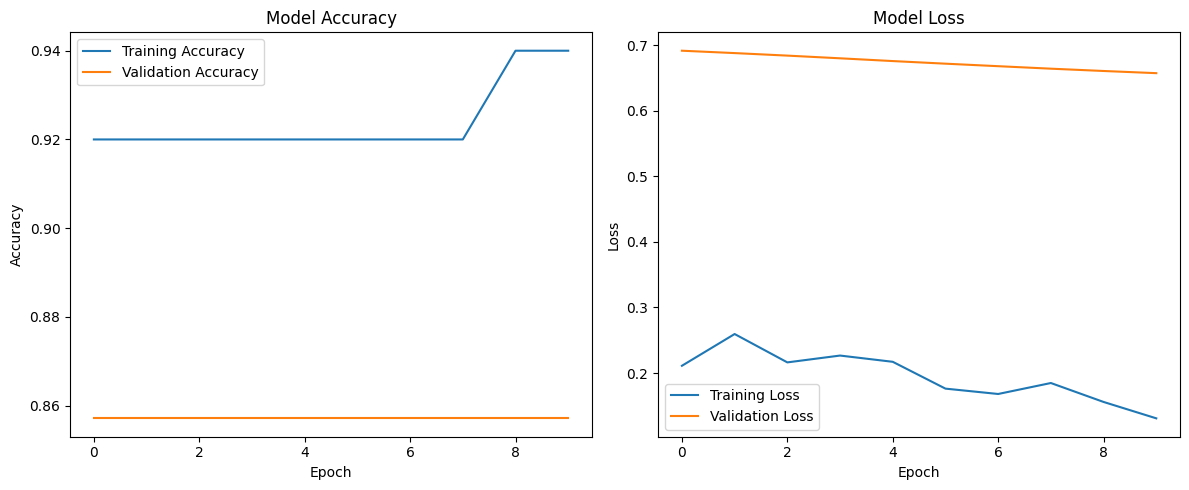

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()